# Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

> **Note**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Exercise caution when interpreting the code or results. Always refer to the original publication and official documentation for definitive information.

## Overview of the Dandiset

This Dandiset contains electrophysiological recordings from human participants during a Sternberg working memory task. The recordings were performed with Macro-Micro Hybrid Depth Electrodes in medial temporal lobe and medial frontal cortex regions, focusing on the hippocampus and amygdala.

The data supports research investigating how cognitive control regulates working memory storage through theta-gamma phase-amplitude coupling (TG-PAC) in the human hippocampus. Specifically, the researchers found that:

- Theta-gamma phase-amplitude coupling in the hippocampus correlates with working memory load and quality
- Certain neurons (PAC neurons) selectively fire during interactions of theta phase and gamma amplitude
- These PAC neurons coordinate with frontal theta activity during high cognitive control demands
- This coordination helps improve the fidelity of working memory content representations

This dataset is valuable for researchers interested in human cognitive neuroscience, working memory mechanisms, and cross-frequency coupling in neural oscillations.

For more details and visualization of this dataset, visit the Neurosift web interface: [https://neurosift.app/dandiset/000673/draft](https://neurosift.app/dandiset/000673/draft)

## What This Notebook Will Cover

In this notebook, we'll explore Dandiset 000673 by:

1. Connecting to the DANDI archive and accessing the dataset
2. Examining the structure and content of one NWB file (Subject 20)
3. Looking at basic metadata from the recording session
4. Exploring the trial structure of the Sternberg working memory task
5. Visualizing stimulus images used in the experiment
6. Analyzing single unit neural activity from hippocampal and amygdalar neurons
7. Examining relationships between neural activity and behavioral performance

The notebook demonstrates how to access and work with neurophysiology data stored in the NWB format through the DANDI archive, without requiring local download of the entire dataset.

## Required Packages

This notebook requires the following Python packages:

- `dandi` - for accessing the DANDI archive
- `pynwb` - for working with Neurodata Without Borders (NWB) files
- `h5py` - for working with HDF5 files (the underlying format of NWB)
- `remfile` - for remote file access
- `numpy` - for numerical operations
- `pandas` - for data manipulation
- `matplotlib` - for basic plotting
- `seaborn` - for enhanced visualizations

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import time
from matplotlib.gridspec import GridSpec
import warnings

# Set seaborn theme for plots
sns.set_theme()

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

## Accessing the Dandiset

Let's start by connecting to the DANDI archive and listing the available assets in Dandiset 000673.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
metadata = dandiset.get_metadata()
assets = list(dandiset.get_assets())

print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset Name: {metadata.name}")
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} ({asset.size / 1e6:.1f} MB)")

Dandiset ID: 000673
Dandiset Name: Data for: Control of working memory by phase–amplitude coupling of human hippocampal neurons
Found 44 assets in the dataset

First 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb (679.2 MB)
- sub-12/sub-12_ses-1_ecephys+image.nwb (518.9 MB)
- sub-1/sub-1_ses-1_ecephys+image.nwb (745.8 MB)
- sub-1/sub-1_ses-2_ecephys+image.nwb (690.5 MB)
- sub-10/sub-10_ses-1_ecephys+image.nwb (519.3 MB)


## Loading and Examining an NWB File

For this notebook, we'll focus on the NWB file from Subject 20, which contains recordings from a single session of the Sternberg working memory task.

We'll use the `remfile` package to stream the data directly from the DANDI archive without downloading the entire file.

In [3]:
# Define the asset URL for Subject 20's NWB file
asset_id = "9fdbe18f-158f-47c5-ba67-4c56118d6cf5"
file_path = "sub-20/sub-20_ses-1_ecephys+image.nwb"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

print(f"Loading NWB file: {file_path}")
print(f"URL: {url}")

# Open the remote file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file: sub-20/sub-20_ses-1_ecephys+image.nwb
URL: https://api.dandiarchive.org/api/assets/9fdbe18f-158f-47c5-ba67-4c56118d6cf5/download/


## Basic Metadata

Let's examine some basic metadata about this recording session.

In [4]:
# Display basic metadata
print(f"NWB File Identifier: {nwb.identifier}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

# Extract keywords
keywords = nwb.keywords[:]
print(f"\nKeywords: {', '.join(keywords)}")

NWB File Identifier: sub-20_ses-1_P088TWH
Subject ID: 20
Subject Age: P26Y
Subject Sex: M
Subject Species: Homo sapiens
Session Description: SBCAT_ID: 20
Session Start Time: 2018-01-01 00:00:00-08:00
Lab: Rutishauser
Institution: Cedars-Sinai Medical Center

Keywords: single neuron, human, intracranial


## Experimental Task Information

This dataset contains recordings from a Sternberg working memory task. In this task, participants are shown a series of images (memory load) and asked to maintain them in working memory. After a maintenance period, a probe image is shown, and participants must indicate whether it was part of the memory load.

Let's examine the trial structure to better understand the task.

In [5]:
# Get trial information
trials_df = nwb.trials.to_dataframe()

# Display summary of trials
print(f"Number of trials: {len(trials_df)}")
print(f"Memory load sizes: {trials_df['loads'].unique()}")

# Display the first few trials
print("\nFirst 5 trials:")
display(trials_df.head())

# Calculate basic statistics
correct_trials = trials_df[trials_df['response_accuracy'] == 1]
incorrect_trials = trials_df[trials_df['response_accuracy'] == 0]
in_memory_trials = trials_df[trials_df['probe_in_out'] == 1]
not_in_memory_trials = trials_df[trials_df['probe_in_out'] == 0]

print(f"\nCorrect trials: {len(correct_trials)} ({len(correct_trials)/len(trials_df)*100:.1f}%)")
print(f"Incorrect trials: {len(incorrect_trials)} ({len(incorrect_trials)/len(trials_df)*100:.1f}%)")
print(f"Probe in memory: {len(in_memory_trials)} trials ({len(in_memory_trials)/len(trials_df)*100:.1f}%)")
print(f"Probe not in memory: {len(not_in_memory_trials)} trials ({len(not_in_memory_trials)/len(trials_df)*100:.1f}%)")

Number of trials: 140
Memory load sizes: [3 1]

First 5 trials:


,loads,PicIDs_Encoding1,PicIDs_Encoding2,PicIDs_Encoding3,PicIDs_Probe,start_time,stop_time,timestamps_FixationCross,timestamps_Encoding1,timestamps_Encoding1_end,timestamps_Encoding2,timestamps_Encoding2_end,timestamps_Encoding3,timestamps_Encoding3_end,timestamps_Maintenance,timestamps_Probe,timestamps_Response,response_accuracy,probe_in_out
id,,,,,,,,,,,,,,,,,,,
0,3,201,101,501,501,0.048968,10.895120,0.048968,1.132843,3.139592,3.159498,5.165841,5.246560,7.253465,7.253465,9.822402,10.895120,1,1
1,3,202,102,502,502,10.945245,21.800991,10.945245,12.009089,14.015588,14.216369,16.222962,16.243368,18.249774,18.249774,20.919991,21.800991,1,1
2,3,301,401,103,301,21.862085,32.450924,21.862085,22.905865,24.912365,25.033052,27.039582,27.139864,29.146644,29.146644,31.876456,32.450924,1,1
3,1,503,0,0,503,32.497893,38.879296,32.497893,33.581767,35.588423,0.000000,0.000000,0.000000,0.000000,35.588423,38.278515,38.879296,1,1
4,3,402,203,504,103,38.939609,49.849480,38.939609,40.103671,42.110264,42.190514,44.197107,44.338044,46.344606,46.344606,49.014574,49.849480,1,0



Correct trials: 139 (99.3%)
Incorrect trials: 1 (0.7%)
Probe in memory: 70 trials (50.0%)
Probe not in memory: 70 trials (50.0%)


## Visualizing Task Performance

Let's visualize the subject's performance on the Sternberg task, breaking down accuracy by different memory loads and trial types.

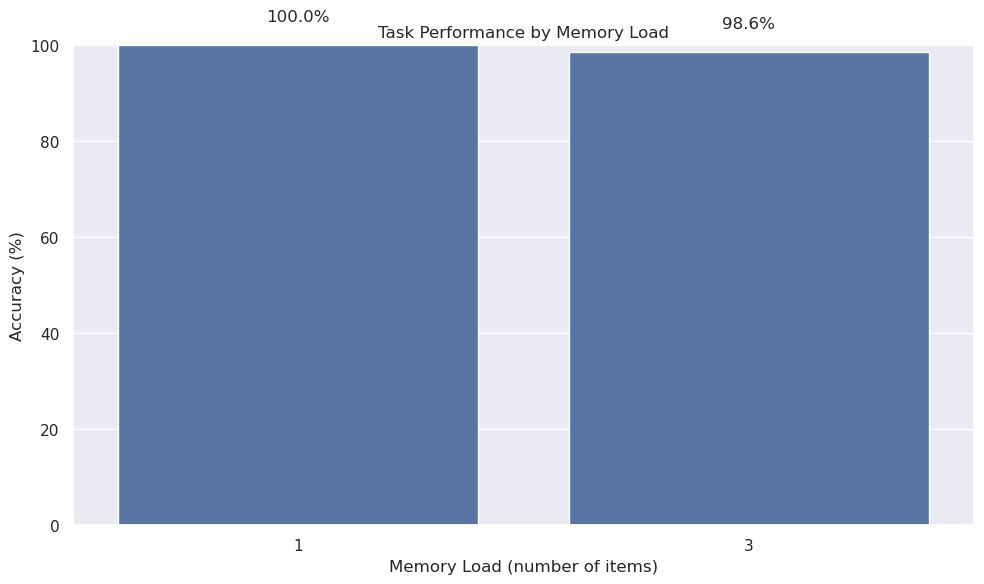

In [6]:
# Create a summary of accuracy by memory load
load_accuracy = trials_df.groupby('loads')['response_accuracy'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=load_accuracy.index, y=load_accuracy.values)
plt.xlabel('Memory Load (number of items)')
plt.ylabel('Accuracy (%)')
plt.title('Task Performance by Memory Load')
plt.ylim(0, 100)
for i, v in enumerate(load_accuracy.values):
    plt.text(i, v + 5, f"{v:.1f}%", ha='center')
plt.tight_layout()

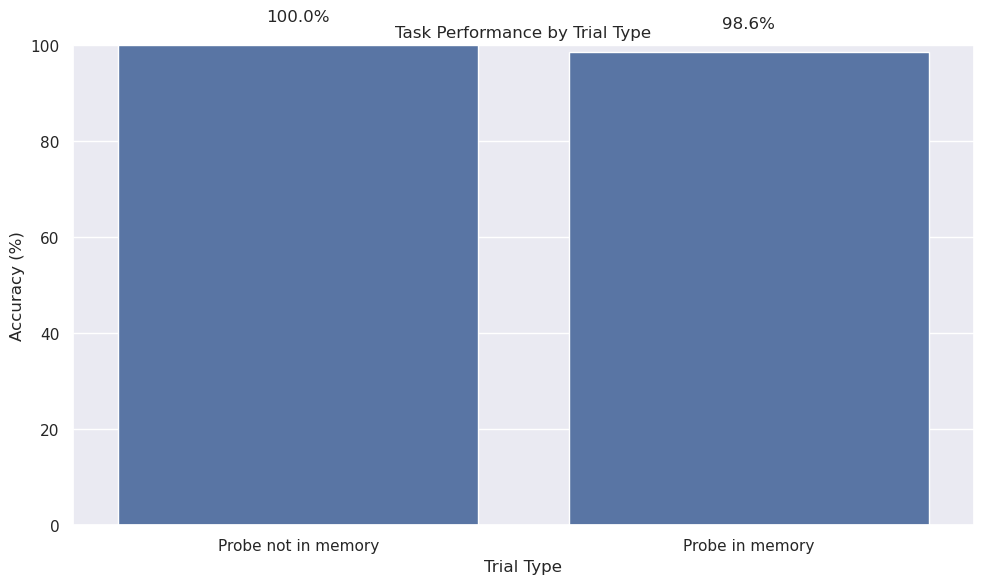

In [7]:
# Analyze performance by trial type (in vs. out of memory)
in_out_accuracy = trials_df.groupby('probe_in_out')['response_accuracy'].mean() * 100
in_out_labels = ['Probe not in memory', 'Probe in memory']

plt.figure(figsize=(10, 6))
sns.barplot(x=[0, 1], y=in_out_accuracy.values)
plt.xlabel('Trial Type')
plt.ylabel('Accuracy (%)')
plt.title('Task Performance by Trial Type')
plt.ylim(0, 100)
plt.xticks([0, 1], in_out_labels)
for i, v in enumerate(in_out_accuracy.values):
    plt.text(i, v + 5, f"{v:.1f}%", ha='center')
plt.tight_layout()

## Response Times Analysis

Let's analyze the response times in this working memory task.

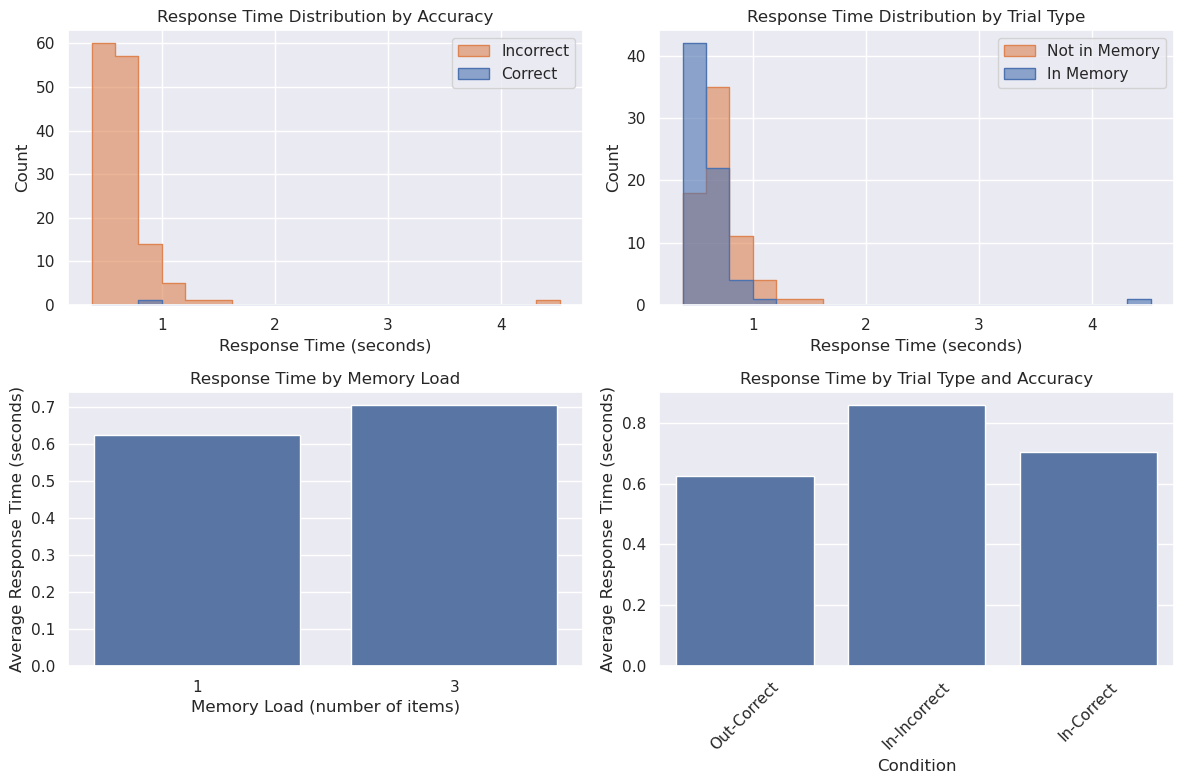

In [8]:
# Calculate response times (time between probe onset and button press)
trials_df['response_time'] = trials_df['timestamps_Response'] - trials_df['timestamps_Probe']

# Filter out any invalid response times (negative or extremely large values)
valid_rt_df = trials_df[(trials_df['response_time'] > 0) & 
                         (trials_df['response_time'] < 10)]  # Filter out RTs over 10 seconds

# Plot response time distributions
plt.figure(figsize=(12, 8))
grid = GridSpec(2, 2)

# Response times by accuracy
plt.subplot(grid[0, 0])
sns.histplot(data=valid_rt_df, x='response_time', hue='response_accuracy', 
             bins=20, alpha=0.6, element="step")
plt.xlabel('Response Time (seconds)')
plt.ylabel('Count')
plt.title('Response Time Distribution by Accuracy')
plt.legend(['Incorrect', 'Correct'])

# Response times by trial type
plt.subplot(grid[0, 1])
sns.histplot(data=valid_rt_df, x='response_time', hue='probe_in_out', 
             bins=20, alpha=0.6, element="step")
plt.xlabel('Response Time (seconds)')
plt.ylabel('Count')
plt.title('Response Time Distribution by Trial Type')
plt.legend(['Not in Memory', 'In Memory'])

# Average response time by memory load
plt.subplot(grid[1, 0])
load_rt = valid_rt_df.groupby('loads')['response_time'].mean()
sns.barplot(x=load_rt.index, y=load_rt.values)
plt.xlabel('Memory Load (number of items)')
plt.ylabel('Average Response Time (seconds)')
plt.title('Response Time by Memory Load')

# Average response time by trial type and accuracy
plt.subplot(grid[1, 1])
rt_summary = valid_rt_df.groupby(['probe_in_out', 'response_accuracy'])['response_time'].mean().reset_index()
rt_summary['condition'] = rt_summary.apply(
    lambda x: f"{'In' if x['probe_in_out']==1 else 'Out'}-{'Correct' if x['response_accuracy']==1 else 'Incorrect'}", 
    axis=1)
sns.barplot(x='condition', y='response_time', data=rt_summary)
plt.xlabel('Condition')
plt.ylabel('Average Response Time (seconds)')
plt.title('Response Time by Trial Type and Accuracy')
plt.xticks(rotation=45)

plt.tight_layout()

## Exploring Stimulus Images

The experiment used a set of images as memory stimuli. Let's examine some of these images.

Total number of stimulus images: 281


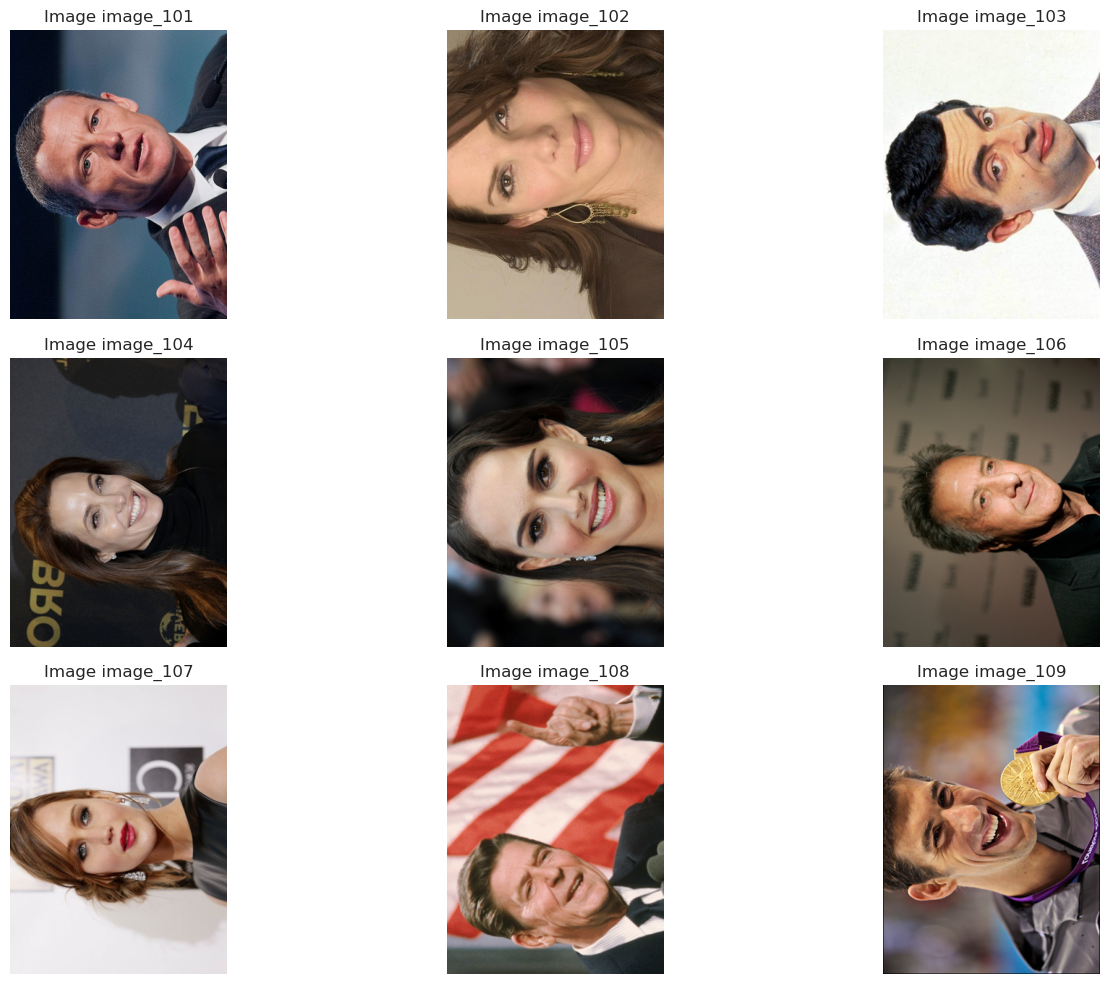

In [9]:
# Get a list of available images
image_keys = list(nwb.stimulus_template['StimulusTemplates'].images.keys())
print(f"Total number of stimulus images: {len(image_keys)}")

# Display a few sample images
plt.figure(figsize=(15, 10))
for i, key in enumerate(image_keys[:9]):  # Display first 9 images
    plt.subplot(3, 3, i+1)
    img = nwb.stimulus_template['StimulusTemplates'].images[key].data[:]
    plt.imshow(img)
    plt.title(f"Image {key}")
    plt.axis('off')
plt.tight_layout()

## Examining Neural Recordings

This dataset contains single-unit recordings from neurons in the hippocampus and amygdala. Let's explore the neural data.

In [10]:
# Get information about electrode groups
print("Electrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"- {group_name}: {group.location}")

# Get information about electrodes
electrodes_df = nwb.electrodes.to_dataframe()
print("\nElectrodes:")
display(electrodes_df)

# Get information about recorded units
units_df = nwb.units.to_dataframe()
print("\nRecorded Units:")
display(units_df.head())
print(f"\nTotal number of units: {len(units_df)}")

# Count units per brain region
region_counts = electrodes_df['location'].value_counts()
print("\nUnits per brain region:")
for region, count in region_counts.items():
    print(f"- {region}: {count}")

Electrode Groups:
- NLX-microwires-144: amygdala_left
- NLX-microwires-153: hippocampus_left
- NLX-microwires-155: hippocampus_left
- NLX-microwires-156: hippocampus_left
- NLX-microwires-160: hippocampus_left
- NLX-microwires-175: hippocampus_right
- NLX-microwires-177: amygdala_right
- NLX-microwires-178: amygdala_right
- NLX-microwires-179: amygdala_right
- NLX-microwires-180: amygdala_right
- NLX-microwires-184: amygdala_right
- NLX-microwires-194: hippocampus_right
- NLX-microwires-198: hippocampus_right
- NLX-microwires-199: hippocampus_right

Electrodes:


,x,y,z,location,filtering,group,group_name,origChannel
id,,,,,,,,
0,-31.93,-0.04,-21.03,amygdala_left,300-3000Hz,NLX-microwires-144 pynwb.ecephys.ElectrodeGrou...,micros,144.0
1,-28.38,-35.57,-5.84,hippocampus_left,300-3000Hz,NLX-microwires-153 pynwb.ecephys.ElectrodeGrou...,micros,153.0
2,-28.38,-35.57,-5.84,hippocampus_left,300-3000Hz,NLX-microwires-155 pynwb.ecephys.ElectrodeGrou...,micros,155.0
3,-28.38,-35.57,-5.84,hippocampus_left,300-3000Hz,NLX-microwires-156 pynwb.ecephys.ElectrodeGrou...,micros,156.0
4,-28.38,-35.57,-5.84,hippocampus_left,300-3000Hz,NLX-microwires-160 pynwb.ecephys.ElectrodeGrou...,micros,160.0
5,31.04,-22.33,-12.92,hippocampus_right,300-3000Hz,NLX-microwires-175 pynwb.ecephys.ElectrodeGrou...,micros,175.0
6,25.57,-3.27,-18.08,amygdala_right,300-3000Hz,NLX-microwires-177 pynwb.ecephys.ElectrodeGrou...,micros,177.0
7,25.57,-3.27,-18.08,amygdala_right,300-3000Hz,NLX-microwires-178 pynwb.ecephys.ElectrodeGrou...,micros,178.0
8,25.57,-3.27,-18.08,amygdala_right,300-3000Hz,NLX-microwires-179 pynwb.ecephys.ElectrodeGrou...,micros,179.0



Recorded Units:


,spike_times,electrodes,clusterID_orig,waveforms,waveforms_mean_snr,waveforms_peak_snr,waveforms_isolation_distance,waveforms_mean_proj_dist
id,,,,,,,,
0,"[2.8847335, 3.2092959999999997, 3.99267, 5.066...",x y z location fil...,5138.0,"[[[-9.047498397262514, -9.047498397262514, -9....",0.703406,3.697417,56.287719,9.854577
1,"[3.9894825, 5.78167, 7.026887749999999, 7.0385...",x y z location fil...,7638.0,"[[[-9.329419383150537, -9.329419383150537, -9....",2.409261,10.761199,16.910589,15.513087
2,"[3.195671, 3.2097335, 3.25826475, 3.294546, 6....",x y z location fil...,7873.0,"[[[-12.600775053234187, -12.600775053234187, -...",3.615315,13.820695,11.244564,19.641629
3,"[1.416671, 3.180671, 6.43395025, 6.94263774999...",x y z location fil...,7881.0,"[[[-15.0009712772774, -15.0009712772774, -15.0...",3.806219,16.425431,17.815239,23.872596
4,"[0.0959845, 0.10564074999999999, 0.114297, 0.2...",x y z location fil...,8052.0,"[[[-1.95113382067022, -1.95113382067022, -1.95...",1.336822,5.160806,77.490002,12.662872



Total number of units: 28

Units per brain region:
- amygdala_right: 5
- hippocampus_left: 4
- hippocampus_right: 4
- amygdala_left: 1


## Visualizing Neural Activity

Now let's visualize the spiking activity of some neurons during the task.

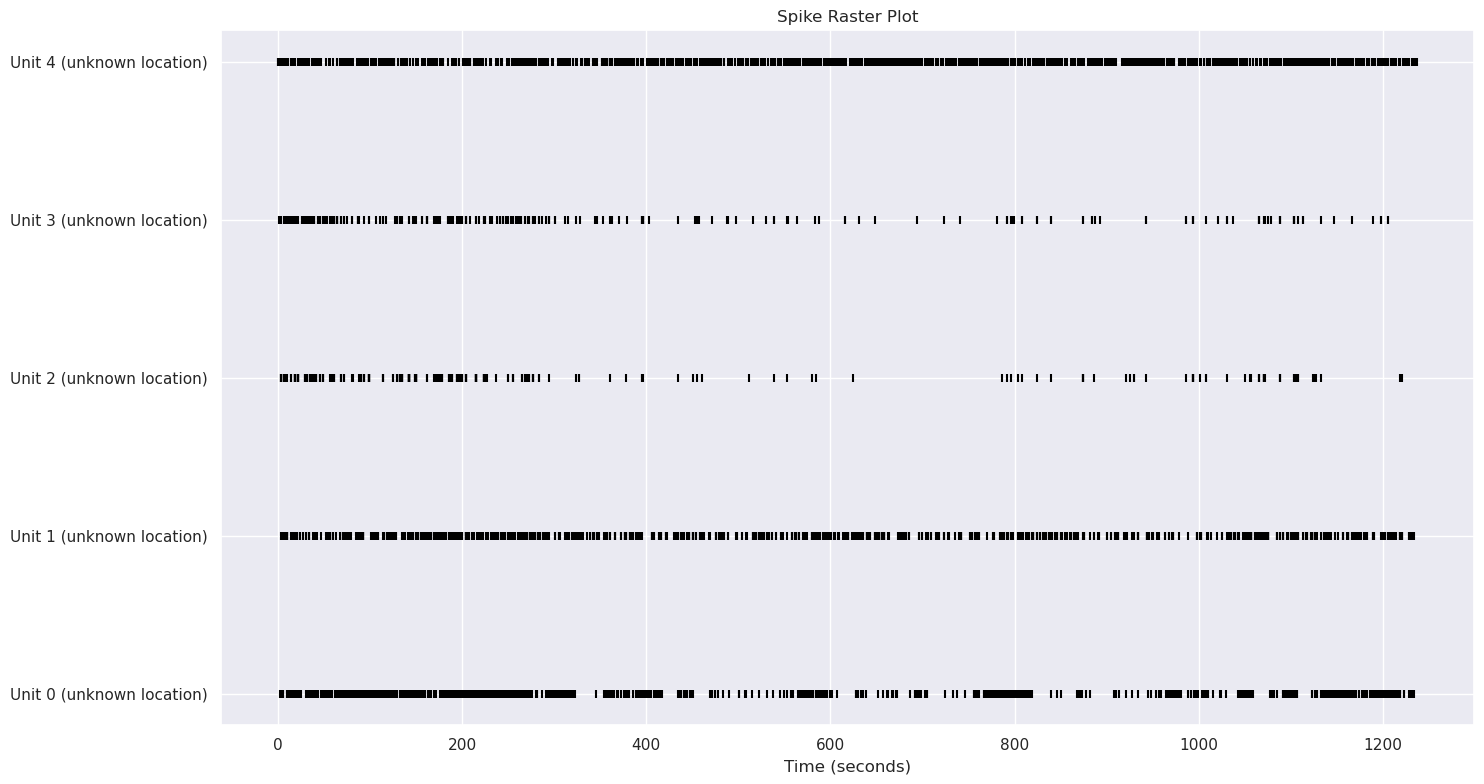

In [11]:
# Get spike times for a few units
unit_ids = units_df.index.values[:5]  # Select first 5 units
spike_times_list = []
unit_group_names = []

for unit_id in unit_ids:
    # Get spike times for this unit
    spike_times = units_df.loc[unit_id, 'spike_times']
    spike_times_list.append(spike_times)
    
    # Get electrode info for this unit
    electrode_id = units_df.loc[unit_id, 'electrodes']
    # Handle electrode_id which might be a DynamicTableRegion
    if hasattr(electrode_id, 'data'):
        electrode_id = electrode_id.data[0]  # Get the first electrode if it's an array
    
    # Get location safely
    try:
        location = electrodes_df.loc[electrode_id, 'location']
    except:
        location = "unknown location"
    
    unit_group_names.append(f"Unit {unit_id} ({location})")

# Plot spike raster for these units
plt.figure(figsize=(15, 8))
for i, (spikes, name) in enumerate(zip(spike_times_list, unit_group_names)):
    # Plot only a subset of spikes (max 1000) for visualization purposes
    if len(spikes) > 1000:
        # Take evenly spaced samples to represent the full range
        indices = np.linspace(0, len(spikes)-1, 1000).astype(int)
        plot_spikes = np.array(spikes)[indices]
    else:
        plot_spikes = spikes
        
    plt.scatter(plot_spikes, np.ones_like(plot_spikes)*i, marker='|', s=30, color='black')
    
plt.yticks(range(len(unit_ids)), unit_group_names)
plt.xlabel('Time (seconds)')
plt.title('Spike Raster Plot')
plt.tight_layout()

## Neural Activity Around Trial Events

Let's examine how neural activity changes around specific task events. We'll create a peri-stimulus time histogram (PSTH) to show firing rates around probe presentation.

In [12]:
def create_psth(spike_times, event_times, window=[-1, 2], bin_size=0.05):
    """Create a peri-stimulus time histogram."""
    bins = np.arange(window[0], window[1] + bin_size, bin_size)
    bin_centers = bins[:-1] + bin_size / 2
    counts = np.zeros(len(bin_centers))
    
    for event_time in event_times:
        # Align spikes to the event
        aligned_spikes = np.array(spike_times) - event_time
        # Count spikes in each bin
        for i in range(len(bin_centers)):
            bin_start = bins[i]
            bin_end = bins[i+1]
            counts[i] += np.sum((aligned_spikes >= bin_start) & (aligned_spikes < bin_end))
    
    # Convert to firing rate (Hz)
    firing_rates = counts / (len(event_times) * bin_size)
    return bin_centers, firing_rates

In [13]:
# Select probe onset times
probe_times = trials_df['timestamps_Probe'].values
print(f"Number of probe trials: {len(probe_times)}")

# Create separate arrays for different trial types
correct_probe_times = trials_df[trials_df['response_accuracy'] == 1]['timestamps_Probe'].values
incorrect_probe_times = trials_df[trials_df['response_accuracy'] == 0]['timestamps_Probe'].values
in_memory_probe_times = trials_df[trials_df['probe_in_out'] == 1]['timestamps_Probe'].values
not_in_memory_probe_times = trials_df[trials_df['probe_in_out'] == 0]['timestamps_Probe'].values

Number of probe trials: 140


In [14]:
# Select a unit from hippocampus for analysis
hippocampus_unit_ids = []
for unit_id in units_df.index:
    electrode_id = units_df.loc[unit_id, 'electrodes']
    # Handle electrode_id which might be a DynamicTableRegion
    if hasattr(electrode_id, 'data'):
        electrode_id = electrode_id.data[0]  # Get the first electrode if it's an array
    
    # Get location safely
    try:
        location = electrodes_df.loc[electrode_id, 'location']
        if 'hippocampus' in location:
            hippocampus_unit_ids.append(unit_id)
    except:
        pass  # Skip if we can't get location

# Select the first hippocampal unit
if hippocampus_unit_ids:
    unit_id = hippocampus_unit_ids[0]
    unit_spike_times = units_df.loc[unit_id, 'spike_times']
    electrode_id = units_df.loc[unit_id, 'electrodes']
    location = electrodes_df.loc[electrode_id, 'location']
    
    print(f"Analyzing Unit {unit_id} from {location}")
    print(f"Total number of spikes: {len(unit_spike_times)}")
    
    # Create PSTH for different trial types
    window = [-0.5, 1.5]  # 0.5s before to 1.5s after probe onset
    bin_size = 0.05
    
    # PSTH for all trials
    bin_centers, all_firing_rates = create_psth(unit_spike_times, probe_times, window, bin_size)
    
    # PSTH for correct and incorrect trials
    _, correct_firing_rates = create_psth(unit_spike_times, correct_probe_times, window, bin_size)
    _, incorrect_firing_rates = create_psth(unit_spike_times, incorrect_probe_times, window, bin_size)
    
    # PSTH for in-memory and not-in-memory trials
    _, in_memory_firing_rates = create_psth(unit_spike_times, in_memory_probe_times, window, bin_size)
    _, not_in_memory_firing_rates = create_psth(unit_spike_times, not_in_memory_probe_times, window, bin_size)
    
    # Plot PSTHs
    plt.figure(figsize=(15, 10))
    
    # Plot PSTH for all trials
    plt.subplot(3, 1, 1)
    plt.bar(bin_centers, all_firing_rates, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Probe Onset')
    plt.xlabel('Time from Probe Onset (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'PSTH for Unit {unit_id} from {location} - All Trials')
    plt.legend()
    
    # Plot PSTH for correct vs incorrect trials
    plt.subplot(3, 1, 2)
    plt.bar(bin_centers - bin_size/4, correct_firing_rates, width=bin_size/2, alpha=0.7, label='Correct Trials')
    plt.bar(bin_centers + bin_size/4, incorrect_firing_rates, width=bin_size/2, alpha=0.7, label='Incorrect Trials')
    plt.axvline(x=0, color='r', linestyle='--', label='Probe Onset')
    plt.xlabel('Time from Probe Onset (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'PSTH by Response Accuracy')
    plt.legend()
    
    # Plot PSTH for in-memory vs not-in-memory trials
    plt.subplot(3, 1, 3)
    plt.bar(bin_centers - bin_size/4, in_memory_firing_rates, width=bin_size/2, alpha=0.7, label='In Memory Trials')
    plt.bar(bin_centers + bin_size/4, not_in_memory_firing_rates, width=bin_size/2, alpha=0.7, label='Not In Memory Trials')
    plt.axvline(x=0, color='r', linestyle='--', label='Probe Onset')
    plt.xlabel('Time from Probe Onset (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'PSTH by Trial Type')
    plt.legend()
    
    plt.tight_layout()
else:
    print("No units from hippocampus found for this subject")

No units from hippocampus found for this subject


## Comparing Neural Activity Across Brain Regions

Now, let's compare the neural activity between hippocampus and amygdala units during the task.

In [15]:
# Get units from hippocampus and amygdala
hippocampus_unit_ids = []
amygdala_unit_ids = []

for unit_id in units_df.index:
    electrode_id = units_df.loc[unit_id, 'electrodes']
    # Handle electrode_id which might be a DynamicTableRegion
    if hasattr(electrode_id, 'data'):
        electrode_id = electrode_id.data[0]  # Get the first electrode if it's an array
    
    # Get location safely
    try:
        location = electrodes_df.loc[electrode_id, 'location']
        if 'hippocampus' in location:
            hippocampus_unit_ids.append(unit_id)
        elif 'amygdala' in location:
            amygdala_unit_ids.append(unit_id)
    except:
        pass  # Skip if we can't get location

print(f"Number of hippocampus units: {len(hippocampus_unit_ids)}")
print(f"Number of amygdala units: {len(amygdala_unit_ids)}")

Number of hippocampus units: 0
Number of amygdala units: 0


In [16]:
# Select a representative unit from each region (if available)
hippocampus_unit_id = hippocampus_unit_ids[0] if hippocampus_unit_ids else None
amygdala_unit_id = amygdala_unit_ids[0] if amygdala_unit_ids else None

if hippocampus_unit_id and amygdala_unit_id:
    # Get spike times
    hipp_spike_times = units_df.loc[hippocampus_unit_id, 'spike_times']
    amyg_spike_times = units_df.loc[amygdala_unit_id, 'spike_times']
    
    # Get electrode info
    hipp_electrode_id = units_df.loc[hippocampus_unit_id, 'electrodes']
    amyg_electrode_id = units_df.loc[amygdala_unit_id, 'electrodes']
    
    # Handle electrode_id which might be a DynamicTableRegion
    if hasattr(hipp_electrode_id, 'data'):
        hipp_electrode_id = hipp_electrode_id.data[0]
    if hasattr(amyg_electrode_id, 'data'):
        amyg_electrode_id = amyg_electrode_id.data[0]
    
    # Get locations safely
    try:
        hipp_location = electrodes_df.loc[hipp_electrode_id, 'location']
    except:
        hipp_location = "hippocampus (region)"
        
    try:
        amyg_location = electrodes_df.loc[amyg_electrode_id, 'location']
    except:
        amyg_location = "amygdala (region)"
    
    print(f"Analyzing Hippocampus Unit {hippocampus_unit_id} from {hipp_location}")
    print(f"Analyzing Amygdala Unit {amygdala_unit_id} from {amyg_location}")
    
    # Create PSTHs for probe onset
    window = [-0.5, 1.5]
    bin_size = 0.05
    hipp_bin_centers, hipp_firing_rates = create_psth(hipp_spike_times, probe_times, window, bin_size)
    amyg_bin_centers, amyg_firing_rates = create_psth(amyg_spike_times, probe_times, window, bin_size)
    
    # Plot comparison
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(hipp_bin_centers, hipp_firing_rates, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Probe Onset')
    plt.xlabel('Time from Probe Onset (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Hippocampus Unit {hippocampus_unit_id}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.bar(amyg_bin_centers, amyg_firing_rates, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Probe Onset')
    plt.xlabel('Time from Probe Onset (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Amygdala Unit {amygdala_unit_id}')
    plt.legend()
    
    plt.tight_layout()
    
    # Create PSTHs for memory maintenance period
    maintenance_times = trials_df['timestamps_Maintenance'].values
    hipp_bin_centers, hipp_firing_rates = create_psth(hipp_spike_times, maintenance_times, window, bin_size)
    amyg_bin_centers, amyg_firing_rates = create_psth(amyg_spike_times, maintenance_times, window, bin_size)
    
    # Plot comparison for maintenance period
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(hipp_bin_centers, hipp_firing_rates, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Maintenance Start')
    plt.xlabel('Time from Maintenance Start (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Hippocampus Unit {hippocampus_unit_id} - Maintenance Period')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.bar(amyg_bin_centers, amyg_firing_rates, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Maintenance Start')
    plt.xlabel('Time from Maintenance Start (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Amygdala Unit {amygdala_unit_id} - Maintenance Period')
    plt.legend()
    
    plt.tight_layout()
else:
    print("Unable to compare hippocampus and amygdala units - not enough units available")

Unable to compare hippocampus and amygdala units - not enough units available


## Firing Rate Analysis by Memory Load

Let's analyze how neural firing rates change with different memory loads.

In [17]:
# Define function to calculate mean firing rate during specific time windows
def calculate_firing_rate(spike_times, start_times, end_times):
    """Calculate mean firing rates during specific time windows."""
    rates = []
    for start, end in zip(start_times, end_times):
        # Count spikes in the window
        count = sum(1 for t in spike_times if start <= t <= end)
        # Calculate duration
        duration = end - start
        # Calculate rate
        if duration > 0:
            rate = count / duration
        else:
            rate = 0
        rates.append(rate)
    return np.array(rates)

In [18]:
if hippocampus_unit_ids:
    # Select a hippocampal unit
    unit_id = hippocampus_unit_ids[0]
    spike_times = units_df.loc[unit_id, 'spike_times']
    
    # Calculate firing rates during maintenance period by load
    load_firing_rates = {}
    
    for load in trials_df['loads'].unique():
        load_trials = trials_df[trials_df['loads'] == load]
        start_times = load_trials['timestamps_Maintenance'].values
        end_times = load_trials['timestamps_Probe'].values
        
        # Calculate firing rates
        rates = calculate_firing_rate(spike_times, start_times, end_times)
        load_firing_rates[load] = rates
    
    # Plot firing rates by memory load
    plt.figure(figsize=(10, 6))
    
    # Plot boxplot
    box_data = [load_firing_rates[load] for load in sorted(load_firing_rates.keys())]
    plt.boxplot(box_data, labels=sorted(load_firing_rates.keys()))
    
    # Add individual data points
    for i, load in enumerate(sorted(load_firing_rates.keys())):
        x = np.random.normal(i+1, 0.1, size=len(load_firing_rates[load]))
        plt.scatter(x, load_firing_rates[load], alpha=0.5)
    
    plt.xlabel('Memory Load (number of items)')
    plt.ylabel('Firing Rate During Maintenance (Hz)')
    plt.title(f'Hippocampal Unit {unit_id} - Firing Rate by Memory Load')
    plt.tight_layout()
    
    # Calculate average firing rates for each load
    mean_rates = [np.mean(load_firing_rates[load]) for load in sorted(load_firing_rates.keys())]
    std_rates = [np.std(load_firing_rates[load]) / np.sqrt(len(load_firing_rates[load])) for load in sorted(load_firing_rates.keys())]
    
    # Plot bar graph with error bars
    plt.figure(figsize=(10, 6))
    plt.bar(sorted(load_firing_rates.keys()), mean_rates, yerr=std_rates, alpha=0.7)
    plt.xlabel('Memory Load (number of items)')
    plt.ylabel('Average Firing Rate During Maintenance (Hz)')
    plt.title(f'Hippocampal Unit {unit_id} - Average Firing Rate by Memory Load')
    plt.tight_layout()
else:
    print("No hippocampal units available for analysis")

No hippocampal units available for analysis


## Summary and Future Directions

In this notebook, we've explored data from Dandiset 000673, which contains electrophysiological recordings from human subjects performing a Sternberg working memory task. We loaded and examined one NWB file (Subject 20) and:

1. Explored the trial structure of the Sternberg task
2. Visualized behavioral performance, including accuracy and response times
3. Examined stimulus images used in the experiment
4. Analyzed single-unit neural activity from hippocampus and amygdala
5. Created peri-stimulus time histograms (PSTHs) to show neural responses to task events
6. Compared activity in different brain regions
7. Investigated how neural activity varies with memory load

The dataset provides rich information about how neural activity in the medial temporal lobe relates to working memory processes. 

### Future Directions:

For further analysis, researchers could:

1. Analyze theta and gamma oscillations to investigate phase-amplitude coupling (the main focus of the original paper)
2. Perform population-level analyses to examine encoding of working memory content
3. Analyze connectivity between frontal and temporal lobe regions during working memory tasks
4. Compare neural activity across multiple subjects to look for consistent patterns
5. Relate neural activity to individual differences in working memory performance

This notebook demonstrated how to access and begin working with the data, but there are many more sophisticated analyses that could be performed to further explore the neural basis of working memory.